In [19]:
import networkx as nx
import math
from aux_functions import *
import matplotlib.pyplot as plt
import random
import time


infinity = 99999999999

quota = 500

dataset = load_dataset('problems/symmetrics/att48.tsp')
n = len(dataset)

G = nx.complete_graph(n) 

{0: Text(6734.0, 1453.0, '0'),
 1: Text(2233.0, 10.0, '11'),
 2: Text(5530.0, 1424.0, '12'),
 3: Text(401.0, 841.0, '13'),
 4: Text(3082.0, 1644.0, '14'),
 5: Text(7608.0, 4458.0, '15'),
 6: Text(7573.0, 3716.0, '16'),
 7: Text(7265.0, 1268.0, '17'),
 8: Text(6898.0, 1885.0, '18'),
 9: Text(1112.0, 2049.0, '19'),
 10: Text(5468.0, 2606.0, '20'),
 11: Text(5989.0, 2873.0, '21'),
 12: Text(4706.0, 2674.0, '22'),
 13: Text(4612.0, 2035.0, '23'),
 14: Text(6347.0, 2683.0, '24'),
 15: Text(6107.0, 669.0, '25'),
 16: Text(7611.0, 5184.0, '26'),
 17: Text(7462.0, 3590.0, '27'),
 18: Text(7732.0, 4723.0, '28'),
 19: Text(5900.0, 3561.0, '29'),
 20: Text(4483.0, 3369.0, '30'),
 21: Text(6101.0, 1110.0, '31'),
 22: Text(5199.0, 2182.0, '32'),
 23: Text(1633.0, 2809.0, '33'),
 24: Text(4307.0, 2322.0, '34'),
 25: Text(675.0, 1006.0, '35'),
 26: Text(7555.0, 4819.0, '36'),
 27: Text(7541.0, 3981.0, '37'),
 28: Text(3177.0, 756.0, '38'),
 29: Text(7352.0, 4506.0, '39'),
 30: Text(7545.0, 2801.0, '4

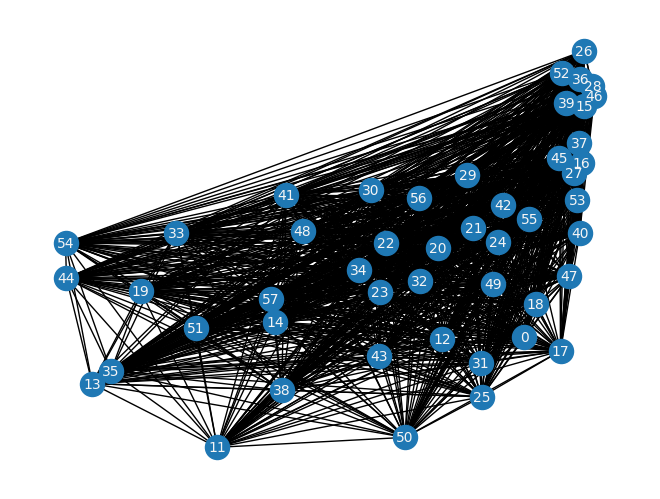

In [20]:
from generation import generation as gen

my_pos = { i : ( dataset[i].x, dataset[i].y ) for i in G.nodes }

bonus_label = {}

for i in G.nodes:
    if(i == 0):
        G.nodes[i]['bonus'] = 0
        bonus_label[0] = G.nodes[i]['bonus']
        G.nodes[i]['penalty'] = infinity
    else:
        bonus = dataset[i].id + 10
        bonus_label[i] = bonus
        G.nodes[i]['bonus'] = bonus
        G.nodes[i]['penalty'] =  500
    G.nodes[i]['id'] = dataset[i].id

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)


# route = gen.generate_random_route(G, quota)


nx.draw(G, pos=my_pos)
nx.draw_networkx_labels(G, my_pos, labels=bonus_label, font_size=10, font_color="whitesmoke")

# plt.figure()
# route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]


# nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)


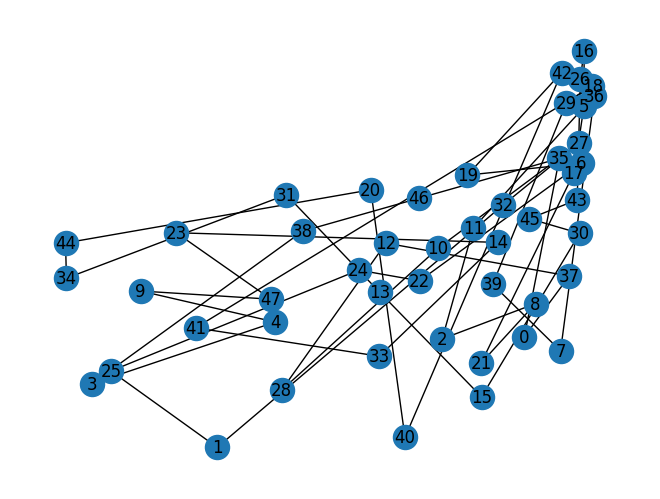

In [21]:
from generation import generation as gen

# ADD_step
route = gen.grasp_construction(G, quota, 0.4)
plt.figure()
route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

In [22]:
# from local_search import local_search as ls

# # lin-kernighan
# route_lin = ls.lin_kernighan(route, G)

# route = [*route_lin[:len(route)]]
# plt.figure()
# route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
# nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

In [23]:
# 2-opt swap
from local_search import local_search as ls

route = ls.swap_2_opt(route, G, my_pos)

bonus_label = bonus_labels(route)

In [24]:
distance = calculate_route_distance(route, G)
cost = route_cost(route, G)
bonus = calculate_bonus_colected(route, G)
print('distance', distance)
print('cost', cost)
print('bonus', bonus)

distance 34329.79004484308
cost 34329.79004484308
bonus 1598


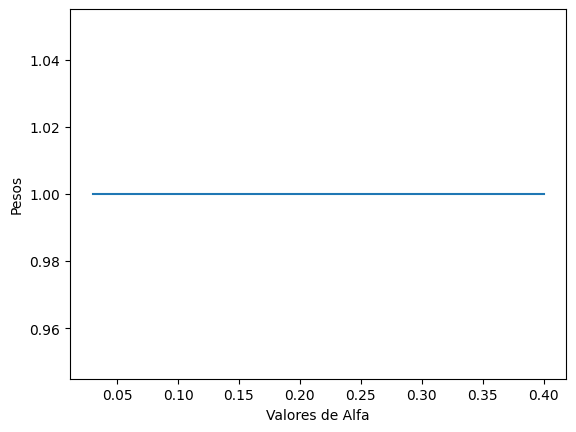

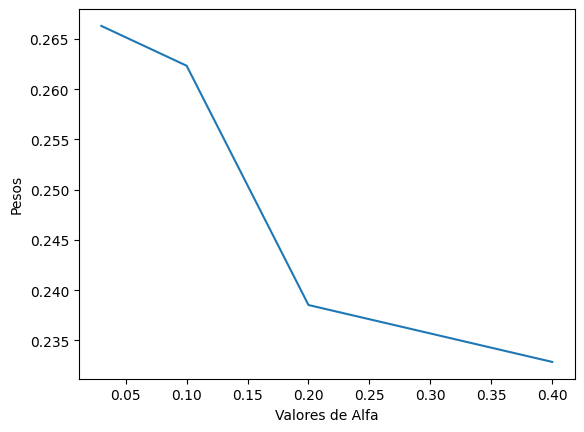

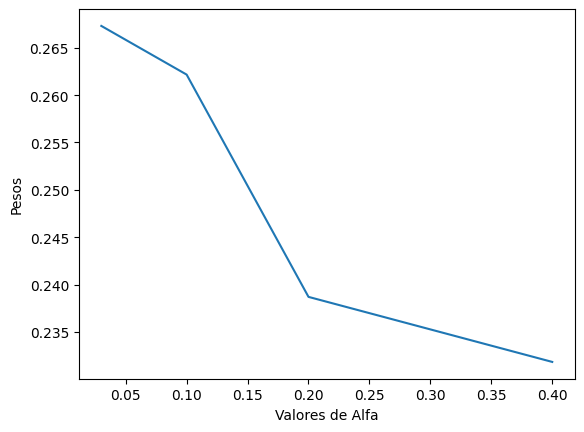

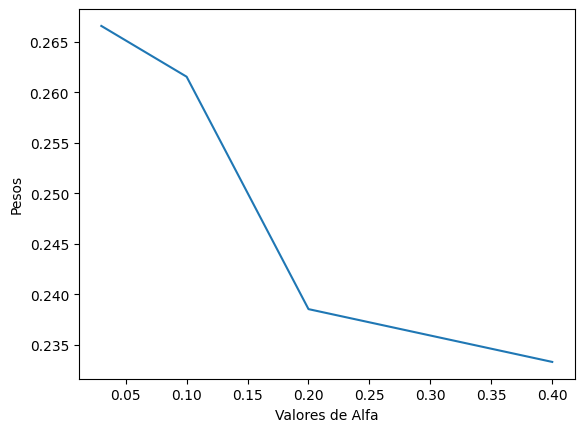

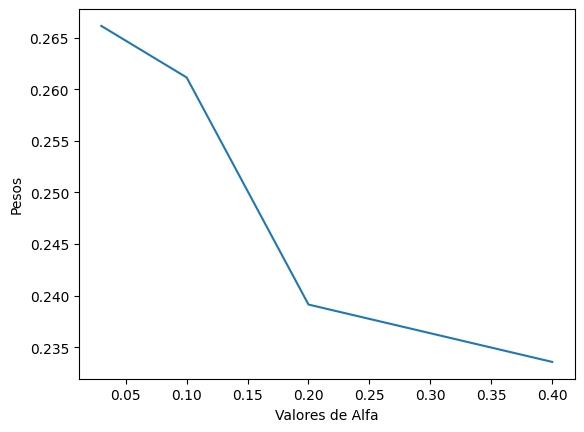

KeyboardInterrupt: 

In [28]:
iterations = 10000
k_itr = 200

best_cost = cost
best_route = route


alfa1 = []
alfa2 = []
alfa3 = []
alfa4 = []

grasp_solutions = []
alfas = [ 0.03, 0.1, 0.2, 0.4]
weights = [1, 1, 1, 1]

count1 = 0

tic = time.perf_counter()
for i in range(iterations):
    
    alfa_grasp = random.choices(alfas, weights=weights, k=1)[0]

    route = gen.grasp_construction(G, quota, alfa_grasp)
    route = gen.drop_step(route, quota, G)
    cost = route_cost(route, G)


    if(route in grasp_solutions):
        count1+=1
        continue
    grasp_solutions.append(route)
    route = ls.swap_2_opt(route, G, my_pos)
    cost = route_cost(route, G)

    if(alfa_grasp == 0.03):
        alfa1.append(cost)
    if(alfa_grasp == 0.1):
        alfa2.append(cost)
    if(alfa_grasp == 0.2):
        alfa3.append(cost)
    if(alfa_grasp == 0.4):
        alfa4.append(cost)

    if(cost<best_cost):
        best_route = route
        best_cost = cost
        alfa_best = alfa_grasp

    if(i == k_itr):
        plt.plot(alfas, weights)

        plt.xlabel('Valores de Alfa')
        plt.ylabel('Pesos')
        plt.show()
        alfa1_av = sum(alfa1) / len(alfa1)
        alfa2_av = sum(alfa2) / len(alfa2)
        alfa3_av = sum(alfa3) / len(alfa3)
        alfa4_av = sum(alfa4) / len(alfa4)

        q1 = best_cost/alfa1_av
        q2 = best_cost/alfa2_av
        q3 = best_cost/alfa3_av
        q4 = best_cost/alfa4_av
        q_total = q1+q2+q3+q4
        weights = [q1/q_total, q2/q_total, q3/q_total, q4/q_total]
        k_itr *= 2
        
    
    

print(weights)
print('alfa_best',alfa_best)
toc = time.perf_counter()
print(f"Finished in {toc - tic:0.4f} seconds")



alfa1_av = sum(alfa1) / len(alfa1)
alfa2_av = sum(alfa2) / len(alfa2)
alfa3_av = sum(alfa3) / len(alfa3)
alfa4_av = sum(alfa4) / len(alfa4)

plt.plot(alfas,[alfa1_av, alfa2_av, alfa3_av, alfa4_av])

plt.xlabel('Valores de Alfa')
plt.ylabel('Custos')
plt.show()

plt.figure()
route_edges = [ (best_route[i-1]['id'],best_route[i]['id']) for i in range(len(best_route)) ]
nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

print('best_cost')
print(best_cost)
